<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 10.10 The Relation between Covariance Matrix and Multivariate Normal Distribution

Create a data set from sampling a given normal distribution and obtain the properties of the sample:

In [19]:
true_mean = np.array([3, 1], dtype=float)
true_cov = np.array([[0.8, 0.3],
[0.3, 0.2]], dtype=float)
X = np.random.multivariate_normal(true_mean, true_cov, size=1200)

In [20]:
sample_cov = np.cov(X, rowvar=False)
sample_mean = np.mean(X, axis=0)

Compute eigenvectors which are aligned with the axes of an ellipse (i.e. the isocontour lines of the PDF):

In [21]:
eigenvec1 = np.linalg.eig(sample_cov)[1][:, 0]
eigenvec2 = np.linalg.eig(sample_cov)[1][:, 1]

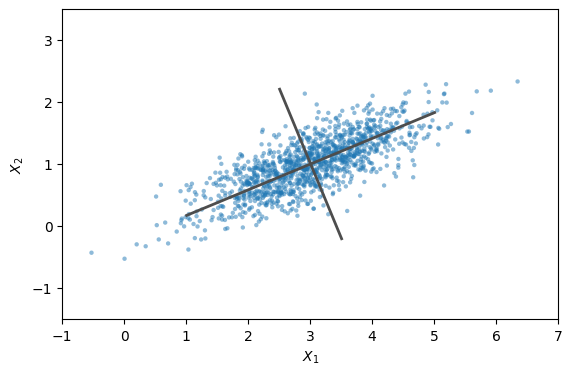

In [27]:
fig, ax = plt.subplots()
ax.set(aspect='equal', xlim=(-1, 7), ylim=(-1.5, 3.5), xlabel='$X_1$', ylabel='$X_2$')
ax.scatter(X[:,0], X[:,1], s=10, alpha=0.5, edgecolors='none')

xa, xb = np.linspace(-2, 2), np.linspace(-0.5, 0.5)
ax.plot(xa + sample_mean[0], eigenvec1[1] / eigenvec1[0] * xa + sample_mean[1], c='0.3', lw=2)
ax.plot(xb + sample_mean[0], eigenvec2[1] / eigenvec2[0] * xb + sample_mean[1], c='0.3', lw=2)


Note that the eigenvectors only give the direction of the two axes of the ellipse but not the length. Here, the lengths were just chose for visula purposes.